In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)
%matplotlib inline

In [3]:
df = pd.read_csv('Datasets/cereal.csv')
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


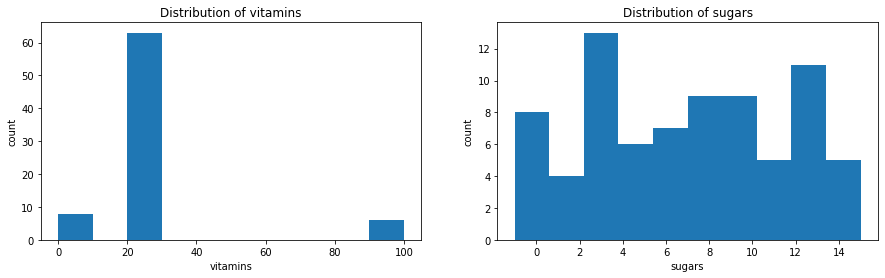

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

ax1.hist(df['vitamins'])
ax1.set_xlabel('vitamins')
ax1.set_ylabel('count')
ax1.set_title('Distribution of vitamins');

ax2.hist(df['sugars'])
ax2.set_xlabel('sugars')
ax2.set_ylabel('count')
ax2.set_title('Distribution of sugars');

In [16]:
names = {'N': 'Nabisco',
        'Q': 'Quaker Oats',
        'K': 'Kelloggs',
        'R': 'Raslston Purina',
        'G': 'General Mills' ,
        'P' :'Post' ,
        'A':'American Home Foods Products'}

df['mfr_name'] = df['mfr'].map(names)

In [17]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,mfr_name
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Nabisco
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Quaker Oats
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Kelloggs
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Kelloggs
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Raslston Purina


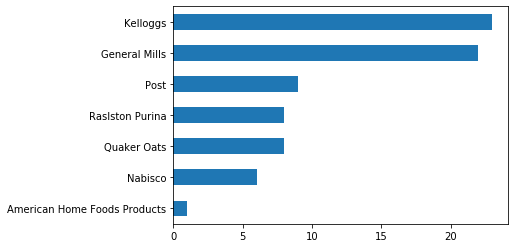

In [38]:
# using matplotlib
df['mfr_name'].value_counts(ascending=True).plot(kind='barh');

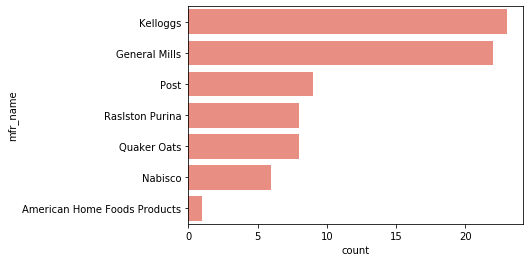

In [75]:
# using seaborn
order = df['mfr_name'].value_counts(ascending=False).index

sns.countplot(y='mfr_name', order=order, data=df, color='Salmon');

In [79]:
# Choose numeric columns as 'predictors' and 'target' variables
y = df['rating']
x = df.loc[:, 'calories':'cups']

In [82]:
# split data into 75-25 train-test set
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [86]:
# Define an fit the model
model = LinearRegression()

model.fit(X_train, y_train);

In [87]:
# model prediction
y_pred = model.predict(X_test)

In [89]:
# model evaluation
mse = np.mean((y_test - y_pred) ** 2)
print(f'Mean Squared Error on test set: {mse}')

Mean Squared Error on test set: 9.107561421514473e-14
